In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.sphinxext.mathmpl import math_role
from sklearn.base import BaseEstimator

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

C:\Users\gaura\AppData\Local\Temp\ipykernel_7212\2605423196.py:8: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [3]:
print(housing.isnull().sum())
housing.head()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


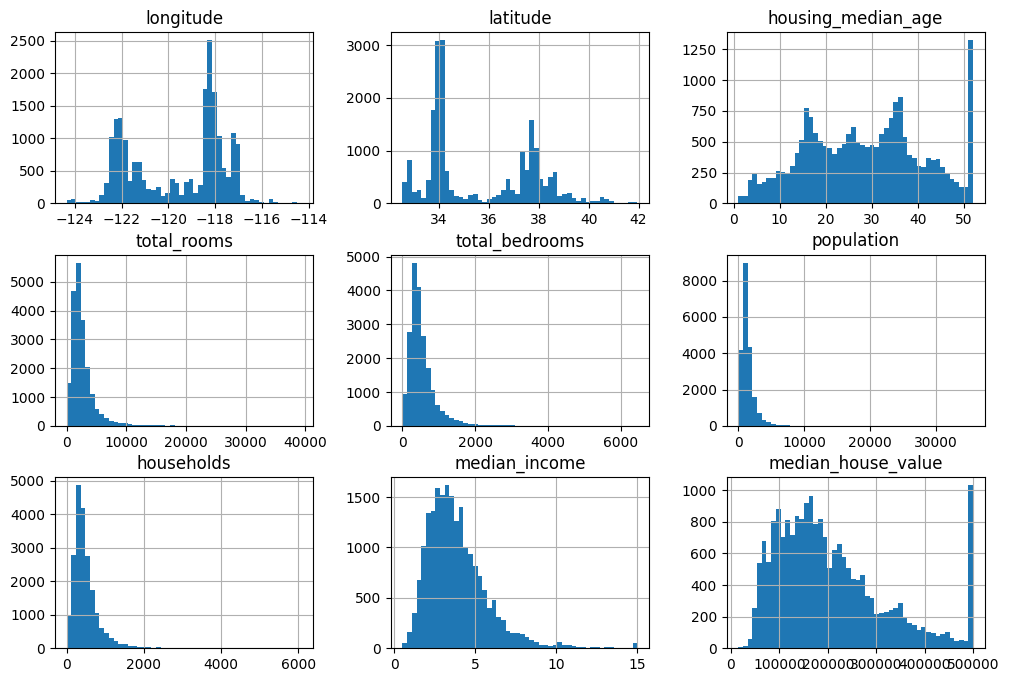

In [7]:
housing.hist(bins=50, figsize=(12,8))
plt.show()
# ? Note that the median income is already scaled

[]

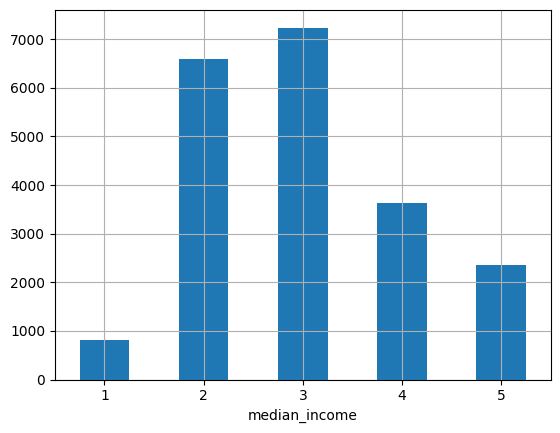

In [8]:
income_cat = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
# 1 -> 0., 1.5
# 2 -> 1.5, 3.0
# 3 -> 3.0, 4.5
# 4 -> 4.5, 6.0
# 5 -> 6.0, inf

# rot => rotate
# Print out each value to see what they do
housing["income_cat"] = income_cat

income_cat.value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.plot()

### Splitting data into 10 samples using sklearn

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

# ? n_splits -> splitting into 10 samples
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    print(len(train_index), len(test_index))

    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]

    strat_splits.append((strat_train_set_n, strat_test_set_n))

curr_split = strat_splits[0]

16512 4128
16512 4128
16512 4128
16512 4128
16512 4128
16512 4128
16512 4128
16512 4128
16512 4128
16512 4128


### OR

In [10]:
from sklearn.model_selection import train_test_split

# ? Stratified Splitting housing on basis of income_category
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

print(f"{len(strat_train_set) = }, {len(strat_test_set) = }")

len(strat_train_set) = 16512, len(strat_test_set) = 4128


In [11]:
print(housing["income_cat"].value_counts() / len(housing["income_cat"])) # the ratio is preserved
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set)) # the ratio is preserved

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


### Since income_cat column is useless now we can drop it

In [12]:
strat_train_set.drop(columns="income_cat", axis=1, inplace=True)
strat_test_set.drop(columns="income_cat", axis=1, inplace=True)

### Making copy of data

In [13]:
chouse = strat_train_set.copy()

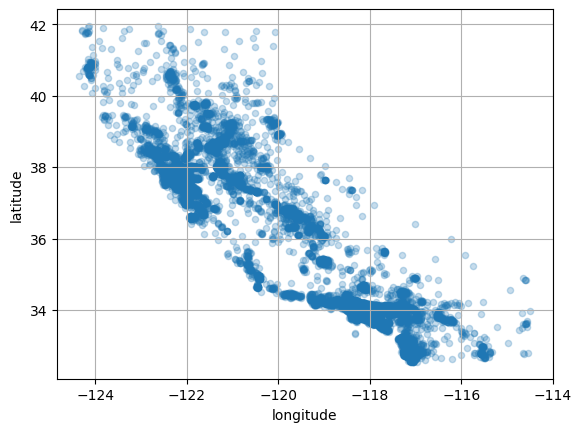

In [14]:
chouse.plot.scatter(x="longitude", y="latitude", grid=True, alpha=0.25) # Easy to spot the most population place
plt.show()

- s -> the size of the points
- c -> color of points
- cmap -> color map (optional)

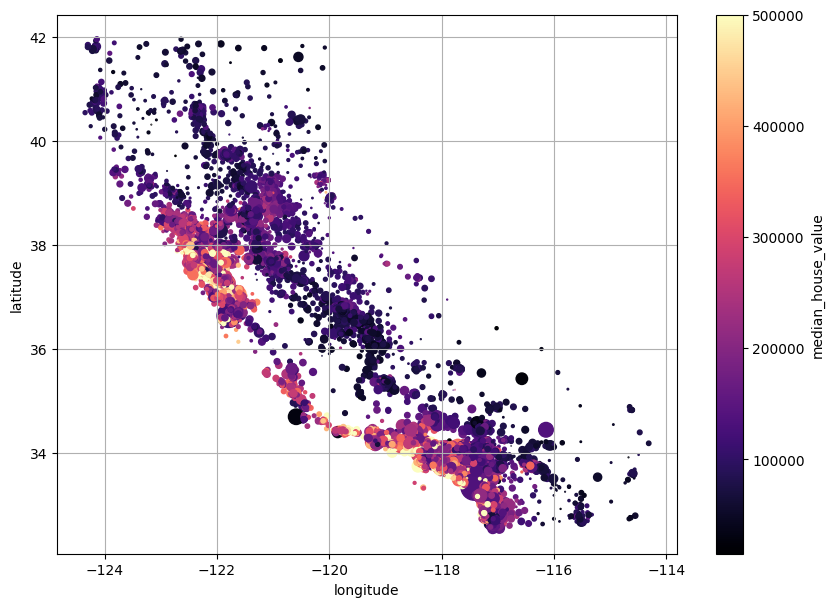

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, c="median_house_value", cmap="magma", legend=True, figsize=(10, 7))
plt.show()

In [16]:
corr_matrix = chouse.corr(numeric_only=True)

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False, key=lambda x: abs(x))

median_house_value    1.000000
median_income         0.688380
latitude             -0.139584
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
longitude            -0.050859
population           -0.020153
Name: median_house_value, dtype: float64

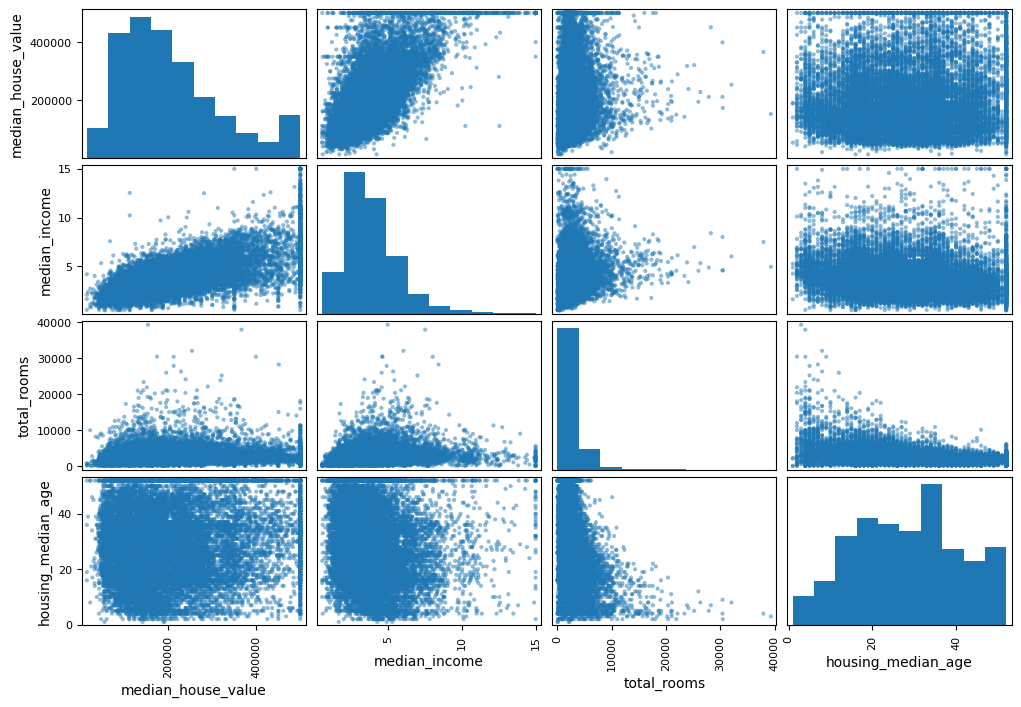

In [18]:
from pandas.plotting import scatter_matrix

# * 11 cols -> 11 * 11 plots
# ? only picking up important features

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(chouse[attributes], figsize=(12, 8), diagonal="hist")
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

# ! We can see that the most important attribute is median_income to predict median_house_value

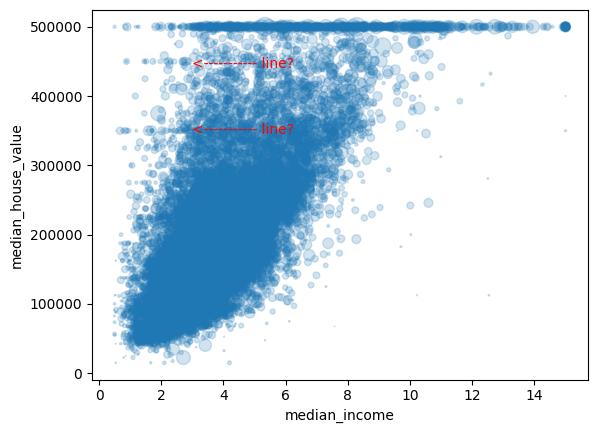

In [19]:
chouse.plot.scatter(x="median_income", y="median_house_value", alpha=0.2, s=chouse["total_rooms"] / 100)
# Found two unknown lines in middle which can mess up learning.
plt.annotate("<----------- line?", (3, 345000), c="r")
plt.annotate("<----------- line?", (3, 440000), c="r")
plt.show()

In [20]:
chouse["rooms_per_house"] = chouse["total_rooms"] / chouse["households"]
chouse["bedrooms_ration"] = chouse["total_bedrooms"] / chouse["total_rooms"]
chouse["people_per_house"] = chouse["population"] / chouse["households"]

In [21]:
corr_mat = chouse.corr(numeric_only=True)

In [22]:
corr_mat["median_house_value"].sort_values(ascending=False, key=lambda x: abs(x))

median_house_value    1.000000
median_income         0.688380
bedrooms_ration      -0.256397
rooms_per_house       0.143663
latitude             -0.139584
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
longitude            -0.050859
people_per_house     -0.038224
population           -0.020153
Name: median_house_value, dtype: float64

## Reverting the data

In [23]:
housing: pd.DataFrame = strat_train_set.drop("median_house_value", axis=1) # features
housing_labels = strat_train_set["median_house_value"].copy() # Labels

### Imputing the data &rarr; Filling in the missing values

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # Using median as the filling values

housing_nums = housing.select_dtypes(include=[np.number])

In [25]:
imputer.fit(housing_nums)

SimpleImputer(strategy='median')

In [26]:
print(f"{all(imputer.statistics_ == housing_nums.median()) = } values\n")
print(f"{imputer.feature_names_in_ = }", "\n")
print(f"{imputer.statistics_ = }") # values of median in this case as strategy -> median

all(imputer.statistics_ == housing_nums.median()) = True values

imputer.feature_names_in_ = array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object) 

imputer.statistics_ = array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])


In [27]:
X = imputer.transform(housing_nums)

In [28]:
housing_tr = pd.DataFrame(np.asarray(X), columns=housing_nums.columns, index=housing_nums.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


## Encoding Object features

In [29]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7274
INLAND             5301
NEAR OCEAN         2089
NEAR BAY           1846
ISLAND                2
Name: count, dtype: int64

### Ordinal Encoding
* Useful for encoding values which have a relation -> high, medium, low

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [32]:
print(housing_cat_encoded[:8])
print(f"\n{ordinal_encoder.categories_ = }")

[[3.]
 [0.]
 [1.]
 [1.]
 [4.]
 [1.]
 [0.]
 [3.]]

ordinal_encoder.categories_ = [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### One Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
cat_encoder = OneHotEncoder(handle_unknown="ignore") 
# ? If the encoder is "fit" on some values that while transforming some other values will come it will ignore it -> (Mark all values as 0)

In [35]:
housing_cat_one_hot = cat_encoder.fit_transform(housing_cat) # Gives sparse matrix
print(type(housing_cat_one_hot))

<class 'scipy.sparse._csr.csr_matrix'>


In [36]:
print(housing_cat_one_hot.toarray()) # converts the sparse matrix to numpy array

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [37]:
cat_encoder.categories_
# Then convert it back to dataframe using pd.hstack()

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [38]:

## ! Possible to use pd.get_dummies() => but not recommended, recommended only for data exploration
pd.get_dummies(housing.head()) # Can't use transform()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,False,False,True,False
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,True,False,False,False
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,False,True,False,False
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,False,True,False,False
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,False,False,False,True


[]

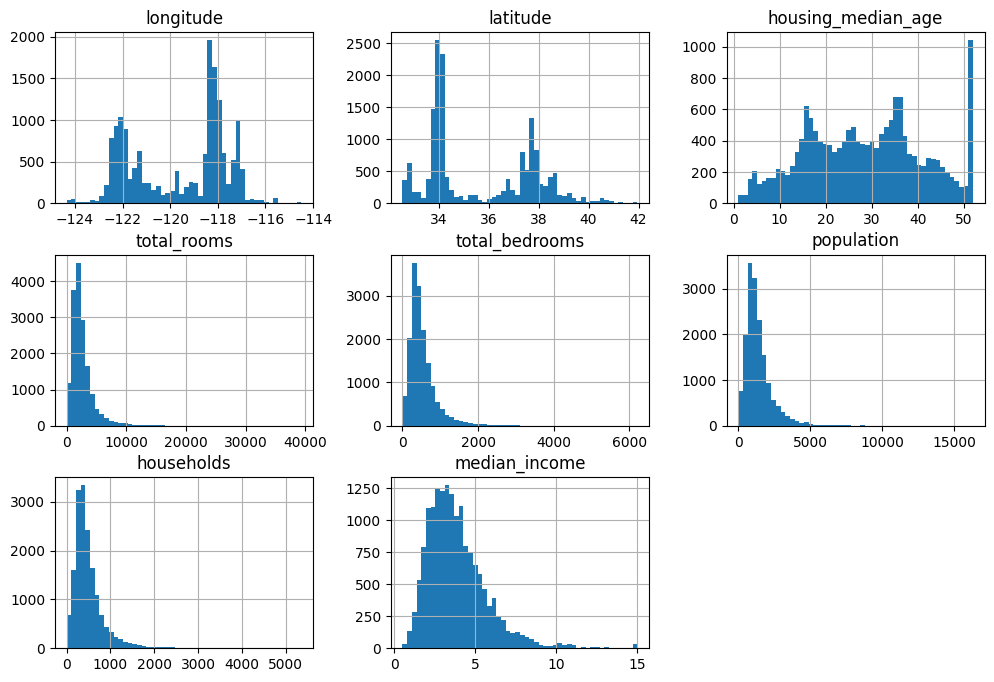

In [39]:
housing.hist(bins=50, figsize=(12, 8))
plt.plot()

Gradual increase in size and then gradual decrease
1      183
2      205
3      651
4     1245
5     3130
6     4062
7     3257
8     2026
9     1198
10     374
11     181
Name: count, dtype: int64


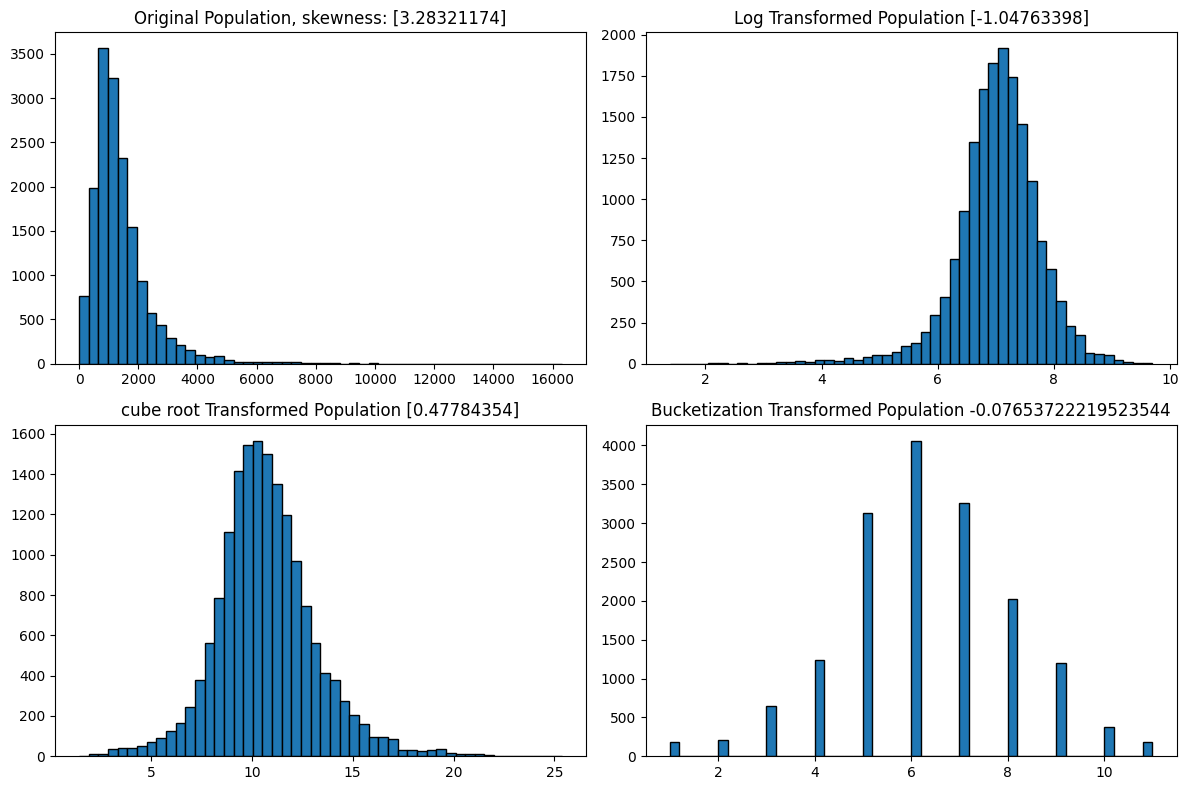

In [40]:
from scipy.stats import skew

population = housing[["population"]]

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Apply transformations
population_log = np.log1p(population)  # Use log1p to avoid log(0) issues
population_cbrt = np.cbrt(population) # using 0.2 is good but -> compressing values too much -> loses the capacity to differentiate b/w values
# print()
bins = [0, 100, 200, 400, 600, 900, 1300, 1800, 2500, 3800, 5600, np.inf]
population_bucket = pd.cut(population.values.reshape(1, -1)[0], bins=bins, labels=range(1, len(bins)))

print("Gradual increase in size and then gradual decrease")
print(population_bucket.value_counts())

# Plot histograms
ax[0][0].hist(population, bins=50, edgecolor='black')
ax[0][0].set_title(f"Original Population, skewness: {skew(population)}")

ax[0][1].hist(population_log, bins=50, edgecolor='black')
ax[0][1].set_title(f"Log Transformed Population {skew(population_log)}")

ax[1][0].hist(population_cbrt, bins=50, edgecolor='black')
ax[1][0].set_title(f"cube root Transformed Population {skew(population_cbrt)}")

ax[1][1].hist(population_bucket, bins=50, edgecolor='black')
ax[1][1].set_title(f"Bucketization Transformed Population {skew(population_bucket)}")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [41]:
housing["population_cbrt"] = population_cbrt
housing.head().columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'population_cbrt'],
      dtype='object')

[]

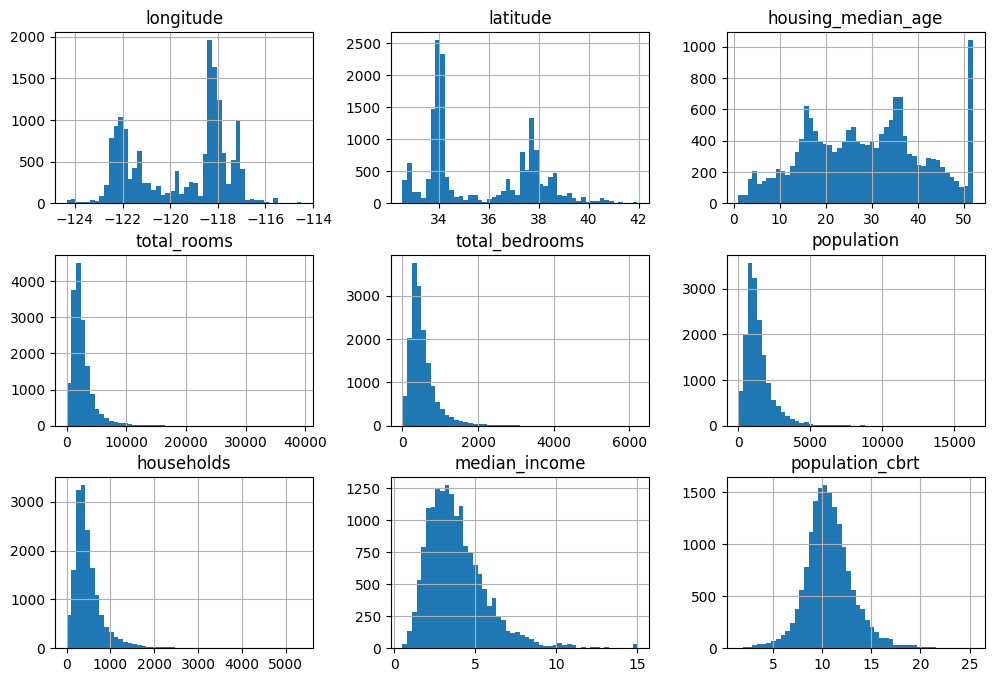

In [42]:
housing.hist(figsize=(12, 8), bins=50)
plt.plot()

### # Multimodal distribution
- We can see that there's a big mode at age = 35 and age = 15

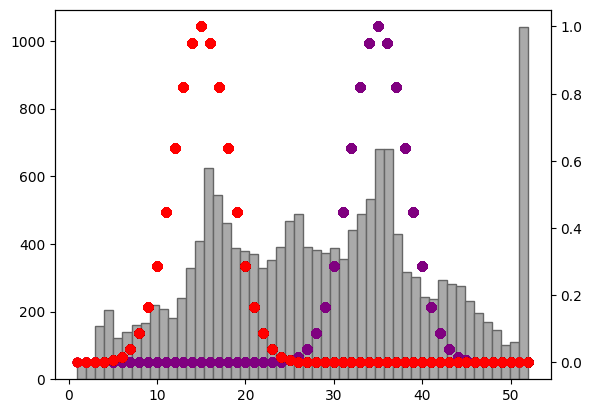

In [43]:
from sklearn.metrics.pairwise import rbf_kernel

age_similar_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.05)
age_similar_15 = rbf_kernel(housing[["housing_median_age"]], [[15]], gamma=0.05)

fig, ax1 = plt.subplots()

ax1.hist(housing["housing_median_age"], bins=50, color="#aaa", edgecolor="#666")

ax2 = ax1.twinx()
ax2.scatter(housing["housing_median_age"], age_similar_35.flatten(), color="purple")
ax2.scatter(housing["housing_median_age"], age_similar_15.flatten(), color="red")
plt.show()

In [44]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler(),)
model.fit(housing[["median_income"]], housing_labels)
model.predict(housing[["median_income"]][:5])

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

### Custom Transformers

In [45]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
transformed = log_transformer.transform(housing[["population"]])
pd.concat([log_transformer.inverse_transform(transformed), housing['population']], axis=1)

,population,population
13096,1576.0,1576.0
14973,666.0,666.0
3785,562.0,562.0
14689,1845.0,1845.0
20507,1912.0,1912.0
...,...,...
14207,938.0,938.0
13105,1419.0,1419.0
19301,2814.0,2814.0
19121,1725.0,1725.0


In [46]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35]], gamma=0.1))
age_similar = rbf_transformer.transform(housing[["housing_median_age"]])
age_similar

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

### Pipeline

In [47]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
  ("impute", SimpleImputer(strategy="median")),
  ("scaling", StandardScaler())
])

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])

In [48]:
num_pipeline.fit(housing_nums, housing_labels)

housing_num_prepared = num_pipeline.fit_transform(housing_nums)
housing_num_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]], shape=(16512, 8))

In [49]:
housing_num_prepared_df = pd.DataFrame(housing_num_prepared, index=housing_nums.index, columns=num_pipeline.get_feature_names_out())

housing_num_prepared_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import  make_pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
  SimpleImputer(strategy="most_frequent"),
  OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer([
  ("num", num_pipeline, num_attribs),
  ("cat", cat_pipeline, cat_attribs)
])

In [51]:
output = preprocessor.fit_transform(housing)
output_df = pd.DataFrame(output, index=housing.index, columns=preprocessor.get_feature_names_out())
output_df

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.compose import make_column_selector

def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  print(function_transformer, feature_names_in)
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(column_ratio, feature_names_out=ratio_name),
    StandardScaler()
  )

log_pipeline = make_pipeline(
  SimpleImputer(strategy="median"),
  FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one"),
  StandardScaler()
)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_bedrooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object))
  ], 
  remainder = default_num_pipeline  # for the remaining columns
)

In [53]:
housing_prepared = preprocessing.fit_transform(housing)
preprocessing.get_feature_names_out()

FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A0396CBB00>,
                    func=<function column_ratio at 0x000001A0396CB380>) ['total_bedrooms' 'total_rooms']
FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A0396CBB00>,
                    func=<function column_ratio at 0x000001A0396CB380>) ['total_bedrooms' 'households']
FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A0396CBB00>,
                    func=<function column_ratio at 0x000001A0396CB380>) ['population' 'households']


array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age', 'remainder__population_cbrt'],
      dtype=object)

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A03734F230>)])),
                ('linearregression', LinearRegression())])

In [55]:
from sklearn.metrics import root_mean_squared_error

housing_predictions = lin_reg.predict(housing)
lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)

lin_rmse

70460.5683265276

In [56]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(max_depth=10, min_samples_leaf=50))
decision_tree_reg.fit(housing, housing_labels)

housing_predictions = decision_tree_reg.predict(housing)
dt_rmse = root_mean_squared_error(housing_labels, housing_predictions)

dt_rmse

54486.544471965244

In [57]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(decision_tree_reg, housing, housing_labels, cv=10, verbose=True, scoring="neg_root_mean_squared_error")

# the sign of rmses is inverted as sklearn k-fold cv uses utility function instead of cost function

pd.Series(tree_rmses).describe()

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished


count       10.000000
mean     58741.270597
std       1294.545051
min      56988.328864
25%      58230.905625
50%      58688.776507
75%      59056.186579
max      61558.534646
dtype: float64

In [97]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = make_pipeline(preprocessing, RandomForestRegressor(max_depth=42, min_samples_split=2))

forest_rmses = -cross_val_score(random_forest_reg, housing, housing_labels, cv=5, scoring="neg_root_mean_squared_error")

pd.Series(forest_rmses).describe()

count        5.000000
mean     50475.947747
std        639.594358
min      49927.021849
25%      50162.457212
50%      50182.845921
75%      50562.174623
max      51545.239129
dtype: float64

## Finding hyperparameters

## GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor())
])

params_grid = [
    {
        "random_forest__max_depth": [20, 30, 35],
        "random_forest__min_samples_leaf": [30, 50, 80]
    },
    {
        "random_forest__max_depth": [40],
        "random_forest__min_samples_split": [10, 30, 50]
    }
]

grid_search = GridSearchCV(full_pipeline, params_grid, scoring="neg_root_mean_squared_error", cv=3)

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001A03734F230>)])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid=[{'random_forest__max_depth': [20, 30, 35],
                          'random_forest__min_samples_leaf': [30, 50, 80]},
                         {'random_forest__max_depth': [40],
                          'random_forest__min_samples_split': [10, 30, 50]}],
             scoring='neg_root_mean_squared_error')

In [74]:
grid_search.best_params_

{'random_forest__max_depth': 40, 'random_forest__min_samples_split': 10}

In [81]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__min_samples_leaf,param_random_forest__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,8.090774,0.195407,0.075208,0.000772,40,NaN,10.0,"{'random_forest__max_depth': 40, 'random_fores...",-50658.203576,-51210.903278,-51611.915440,-51160.340765,390.989348,1
10,6.913185,0.084126,0.060121,0.001273,40,NaN,30.0,"{'random_forest__max_depth': 40, 'random_fores...",-51611.933868,-52120.745060,-52914.516612,-52215.731847,536.002064,2
11,6.454007,0.007362,0.052744,0.001589,40,NaN,50.0,"{'random_forest__max_depth': 40, 'random_fores...",-52671.849741,-52997.982774,-54094.423245,-53254.751920,608.482615,3
6,4.976212,0.043375,0.047215,0.001446,35,30.0,NaN,"{'random_forest__max_depth': 35, 'random_fores...",-54793.956741,-55052.312314,-56268.456775,-55371.575277,642.901868,4
3,4.875737,0.088128,0.046447,0.000744,30,30.0,NaN,"{'random_forest__max_depth': 30, 'random_fores...",-54912.742796,-55217.285999,-56044.989728,-55391.672841,478.402799,5
0,4.876728,0.025453,0.046119,0.000439,20,30.0,NaN,"{'random_forest__max_depth': 20, 'random_fores...",-54929.364018,-55106.440262,-56246.805237,-55427.536506,583.803586,6
4,4.294830,0.029996,0.041307,0.000099,30,50.0,NaN,"{'random_forest__max_depth': 30, 'random_fores...",-57386.992255,-57021.033878,-58466.116140,-57624.714091,613.432658,7
1,4.305356,0.053750,0.041346,0.000102,20,50.0,NaN,"{'random_forest__max_depth': 20, 'random_fores...",-57345.085084,-57194.746646,-58393.788554,-57644.540095,533.341887,8
7,4.264166,0.005012,0.041709,0.000472,35,50.0,NaN,"{'random_forest__max_depth': 35, 'random_fores...",-57361.638913,-57265.156353,-58434.004165,-57686.933144,529.725435,9
2,3.815802,0.016781,0.038738,0.000852,20,80.0,NaN,"{'random_forest__max_depth': 20, 'random_fores...",-59497.178206,-59188.864000,-60158.823369,-59614.955192,404.647055,10


## RandomizedSearchCV

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_random = [
    {
        "random_forest__max_depth": randint(low=42, high=43),
        "random_forest__min_samples_leaf": randint(low=2, high=33),
        "random_forest__min_samples_split": randint(low=50, high=80)
    },
]

rnd_search = RandomizedSearchCV(full_pipeline, params_random, n_iter=30, cv=3, scoring="neg_root_mean_squared_error", random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                   param_distributions=[{'random_forest__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A03DFA0D50>,
                                         'random_forest__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A03DFA0E50>,
                                         'random_forest__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A0477887D0>}],
                   random_state=42, scoring='neg_root_mean_squared_error')

In [91]:
rnd_search.best_params_

{'random_forest__max_depth': 42,
 'random_forest__min_samples_leaf': 7,
 'random_forest__min_samples_split': 51}

In [96]:
pd.DataFrame(rnd_search.cv_results_).sort_values(by="mean_test_score", ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_depth,param_random_forest__min_samples_leaf,param_random_forest__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,5.797239,0.060345,0.049842,0.000791,42,7,51,"{'random_forest__max_depth': 42, 'random_fores...",-52963.293237,-53415.108651,-54041.958188,-53473.453358,442.291456,1
8,5.827913,0.011982,0.048696,0.000388,42,5,57,"{'random_forest__max_depth': 42, 'random_fores...",-53167.738166,-53544.382171,-54349.485085,-53687.201807,492.902648,2
15,6.092114,0.168318,0.049697,0.001269,42,2,61,"{'random_forest__max_depth': 42, 'random_fores...",-53166.226293,-53618.059190,-54540.110818,-53774.798767,571.731372,3
2,7.458137,1.998672,0.078607,0.016212,42,12,57,"{'random_forest__max_depth': 42, 'random_fores...",-53312.105691,-53764.547436,-54672.635321,-53916.429483,565.721566,4
6,5.570426,0.014859,0.048350,0.001819,42,12,60,"{'random_forest__max_depth': 42, 'random_fores...",-53440.381495,-53853.609827,-54671.199622,-53988.396981,511.438493,5
11,5.726816,0.094747,0.047021,0.000641,42,3,73,"{'random_forest__max_depth': 42, 'random_fores...",-53594.087678,-54151.816453,-54796.317761,-54180.740631,491.234329,6
28,5.637848,0.034302,0.048079,0.001340,42,6,68,"{'random_forest__max_depth': 42, 'random_fores...",-53657.955005,-54083.078477,-54852.899931,-54197.977805,494.553493,7
29,5.563522,0.056883,0.048025,0.000791,42,8,70,"{'random_forest__max_depth': 42, 'random_fores...",-53601.329437,-54164.896841,-54957.131516,-54241.119265,556.121817,8
0,5.789105,0.229359,0.047967,0.001436,42,8,69,"{'random_forest__max_depth': 42, 'random_fores...",-53688.059261,-54170.446102,-54978.976161,-54279.160508,532.591606,9
4,10.247484,0.169943,0.085721,0.001007,42,8,75,"{'random_forest__max_depth': 42, 'random_fores...",-53955.177805,-54237.187222,-55109.811448,-54434.058825,491.503499,10


In [113]:
final_model = rnd_search.best_estimator_
feature_importance = final_model["random_forest"].feature_importances_
sorted(zip(final_model["preprocessing"].get_feature_names_out(), feature_importance), reverse=True, key=lambda x: x[1])

FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A0396CBB00>,
                    func=<function column_ratio at 0x000001A0396CB380>) ['total_bedrooms' 'total_rooms']
FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A0396CBB00>,
                    func=<function column_ratio at 0x000001A0396CB380>) ['total_bedrooms' 'households']
FunctionTransformer(feature_names_out=<function ratio_name at 0x000001A0396CBB00>,
                    func=<function column_ratio at 0x000001A0396CB380>) ['population' 'households']


[('log__median_income', np.float64(0.5469436102955351)),
 ('cat__ocean_proximity_INLAND', np.float64(0.16883731419825282)),
 ('people_per_house__ratio', np.float64(0.12381653264847822)),
 ('remainder__longitude', np.float64(0.04642340496400988)),
 ('remainder__latitude', np.float64(0.04275945041613203)),
 ('remainder__housing_median_age', np.float64(0.03515513619763197)),
 ('bedrooms__ratio', np.float64(0.011221470348473912)),
 ('rooms_per_house__ratio', np.float64(0.009165668736416303)),
 ('log__total_rooms', np.float64(0.003900919491771044)),
 ('log__total_bedrooms', np.float64(0.0035085912601087598)),
 ('log__households', np.float64(0.0028861374244269883)),
 ('cat__ocean_proximity_NEAR OCEAN', np.float64(0.0018855571897287702)),
 ('remainder__population_cbrt', np.float64(0.0015453259070720305)),
 ('log__population', np.float64(0.001530029498214948)),
 ('cat__ocean_proximity_<1H OCEAN', np.float64(0.00023791844302079588)),
 ('cat__ocean_proximity_NEAR BAY', np.float64(0.0001829329807

In [128]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test["population_cbrt"] = np.cbrt(X_test["population"])

In [131]:
final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
final_rmse

53312.23756082469

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity', 'population_cbrt'],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity', 'population_cbrt'],
       dtype='object'))